## Projekt Neuronales Netzwerk

### 1. Keras und Tensorflow installieren

- Keras ist in Tensorflow Integriert worden.
- Keras ist in Python entwickelt, Tensorflow in C++
- Keras komofrtabele Schnittstelle um auf Tensorflow zuzugreifen
- es reicht aus, Tensorflow zu installieren.
- Tensorflow läuft nur mit Python bis zur Version 3.12.

In [ ]:
!pip3 install tensorflow

In [2]:
import keras

In [3]:
keras.__version__

'3.8.0'

### 2. Die Daten

Datenbank: FASHIONMNIST

- 10 Kategorien: 
  - T-Shirt
  - Trousers
  - Dress
  - Coat
  - Sandale
  - Shirt
  - Pullover
  - Sneaker
  - Bag
- jedes Bild ist 28 x 28 Pixel groß
- Bilder in Graustufen

Beispiele:

![](/Users/martin/Workspace/Jupyter_Notebooks/Info_KS/6_Artificial_Intelligence/images/The-FashionMNIST-dataset-consists-of-10-classes-of-monochrome-clothing-items-and-is.png){width=400px}


### 3. Aufbau eines neuronales Netzwerk zur Erkennung eines T-Shirts.

- Entscheidungsfrage: Ist auf dem Bild ein T-Shirt zu sehen oder nicht?
- Aufbau:
  - Eingans-Layer: 28 x 28 Pixel, dh. 28*28=784 Eingänge
  - Hidden Layer: 100 Neuronen
  - Output-Layer: 1 Neuron mit der Ausgabe, ob es sich um ein T-Shirt handelt (1) oder nicht (0)
  

#### 3.1. Bilder einlesen

In [4]:
import gzip
import numpy as np 

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


Ein Numpy Array wird erzeugt mit den eingelesenen Werten

In [5]:
#Daten einlesen
x_training = open_images("train-images-idx3-ubyte.gz")

In [6]:
x_training

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [7]:
x_training.shape

(60000, 28, 28)

#### 3.2 Exkurs - Numpy-Array


- Modulimport 
  ```python 
  import numpy as np
  ```
- Numpy-Array
  - effizienter als Python-Listen
  - zusätzliche Operationen
  - Matrixausgabe möglich

In [8]:
a=np.array([1,2,3,4])
print (a)
print(a*2)
print(a+3)
print(a+a)
print(a*a)
matrix = np.array([[1,2,3],[4,5,6]])

print(matrix)
print(matrix[0,1])
print(matrix[:,1])


[1 2 3 4]
[2 4 6 8]
[4 5 6 7]
[2 4 6 8]
[ 1  4  9 16]
[[1 2 3]
 [4 5 6]]
2
[2 5]


#### Exkurs - Ende

In [ ]:
#!pip3 install matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

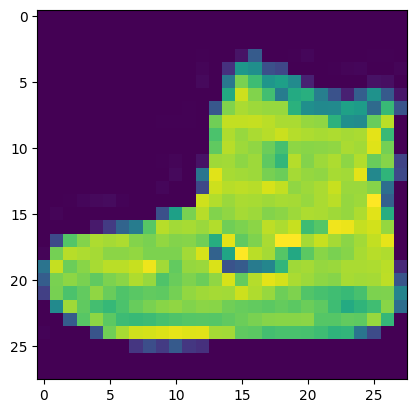

In [40]:
#%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(x_training[0])
#plt.imshow(x_training[1])
#plt.imshow(X_training[2], cmap="gray_r")
plt.show

### 3.3 Daten einlesen

In [41]:
def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)


In [42]:
#Label einlesen 
y_training = open_labels("train-labels-idx1-ubyte.gz")

In [43]:
# Label anzeigen
y_training

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### 3.4. Modell erstellen

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
model1 = Sequential()
# Alle Gewichte verknüpft : Dense
# Aktivivierungsfunktion : Sigmoid
# Es werden 784 Pixel, also 784 Zahlen an 784 Eingänge übergeben
# 100 Neuronen

model1.add(Dense(100, activation="sigmoid",input_shape=(784,))) 
# Ausgabeschicht hat nur ein Neuron
model1 .add(Dense(1, activation="sigmoid"))

# Optimizer : Lernverfahren für die Gewichte
# loss : Standardwert

model1.compile(optimizer="sgd", loss="binary_crossentropy")
#wichtig für Compilierung eines effizienten Codes



### 4. Modell trainieren




#### 4.1 Form der Label anpassen

In [46]:
y_training

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Schreibe dort True rein, wo im Array 0 steht. Der Wert Null entspricht einem T-Shirt

In [47]:
y_training == 0

array([False,  True,  True, ..., False,  True, False])

Dieses Ergebnis ist nicht gespeichert. Man muss es noch der Variablen `y_training` zuordnen.

In [48]:
# Ergebnisse des Vergleichs sind temporär. daher müssen sie wieder in die Variable y_training geschrieben werden.abs 
y_training = y_training == 0

#### 4.2 Form der Daten anpassen

In [49]:
x_training.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Daten müssen angepasst in der Form angepasst. Wir brauchen 60.000 Datenstränge, die jeweils 784 Daten enthalten. Dafür benutzen wir die Funktion `reshape`

### 4.3 Training

In [50]:
# epochs : 10 mal werden die Daten durchlaufen
# batch : 1000 Bilder, dann werden die Gewichte adaptiert

model1.fit(
    x_training.reshape(60000, 784),
    y_training,
    epochs = 10,
    batch_size =1000)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3249
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1874
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1632
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1473
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1390
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1331
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1294
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1252
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1236
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1236


### 5. Vorhersage

#### 5.1 Beispiel 1

In [51]:
print(y_training[0])

False


Das erste Bild ansehen mit `matplotlib` 

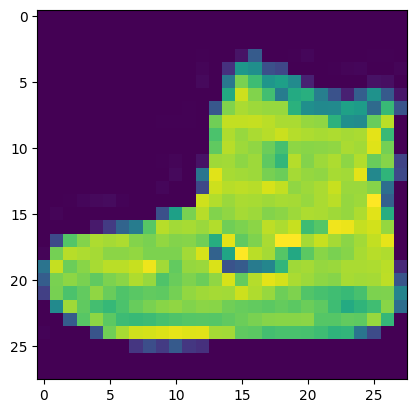

In [52]:
plt.imshow(x_training[0])

Unser kNN bekommt das erste Bild unserer Trainingsdaten `x_training` übergeben und soll entscheiden, ob es sich dabei um ein T-Shirt handelt, oder nicht.

In [53]:
model1.predict(x_training[0].reshape(1,784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.00320082]], dtype=float32)

##### Ergebnis: Zu 0,003% stellt das Bild 1 ein T-Shirt dar

#### Beispiel 2:

In [54]:
print(y_training[1])

True


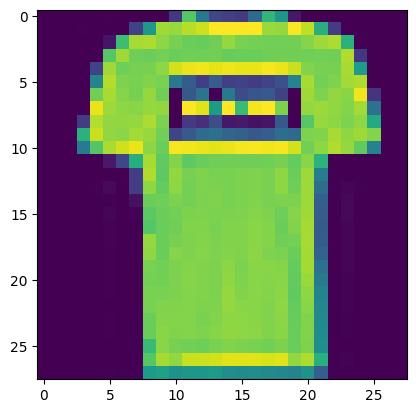

In [55]:
plt.imshow(x_training[1])

Unser kNN bekommt das zweite  Bild unserer Trainingsdaten `x_training` übergeben und soll entscheiden, ob es sich dabei um ein T-Shirt handelt, oder nicht.

In [56]:
model1.predict(x_training[1].reshape(1,784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.8191094]], dtype=float32)

##### Ergebnis: Zu 82,28% stellt das Bild 2 ein T-Shirt dar.

### 6. Genauigkeit berechnen

Aus dem Prozentwert soll eine Aussage getroffen werden. Cut of ist 50%
Das Maß Geanuigkeit gibt an, wie gut das Neuronale Nezt ist.

In [57]:
y_training_predict = model1.predict(x_training.reshape(60000, 784))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step


In [58]:
y_training_predict

array([[0.00320082],
       [0.8191094 ],
       [0.12419972],
       ...,
       [0.02401348],
       [0.64740264],
       [0.00579945]], dtype=float32)

In [59]:
np.round(y_training_predict)

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

Vergleich mit den echten Labels (y-Daten)

In [60]:
y_training

array([False,  True,  True, ..., False,  True, False])

Format muss angepasst werden

In [61]:
np.round(y_training_predict).reshape(60000)
#np.round(y_training_predict).reshape(-1) ist einen Zahlunabhängige Alternative 


array([0., 1., 0., ..., 0., 1., 0.], dtype=float32)

Die 60.000 Werte stehen jetzt immer hintereinander

Vergleich der Daten

In [62]:
np.round(y_training_predict).reshape(-1) == y_training

array([ True,  True, False, ...,  True,  True,  True])

In [63]:
np.mean(np.round(y_training_predict).reshape(-1) == y_training)

np.float64(0.9541333333333334)

Es wurde mit dem NN eine Genauigkeit von 95%. Die Genauigkeit wurde manuel bestimmt. Mit Keras geht das auch einfacher.

In [64]:
model1.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

In [65]:
model1.fit(
    x_training.reshape(60000, 784),
    y_training,
    epochs = 10,
    batch_size =1000)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9549 - loss: 0.1167
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9559 - loss: 0.1149
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9545 - loss: 0.1168
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9540 - loss: 0.1163
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9548 - loss: 0.1148
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9564 - loss: 0.1112
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9559 - loss: 0.1125
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9567 - loss: 0.1081
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9564 - loss: 0.1090
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9554 - loss: 0.1108


In [66]:
model1.evaluate(x_training.reshape(60000, 784), y_training)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.9559 - loss: 0.1075


[0.10759101808071136, 0.956766664981842]

Der erste Wert der Liste sind die Kosten,
der zweit Wert der Liste ist die Genauigkeit.